In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn import decomposition
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time


In [4]:
link1='https://drive.google.com/open?id=1LAXOvFLyMmK8Pkdw6efWhGHtIQpkGnYd'

fluff, id = link1.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv') 
training_data  = pd.read_csv('train.csv')

1LAXOvFLyMmK8Pkdw6efWhGHtIQpkGnYd


In [5]:
training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
labels  = training_data['label']
training_data = training_data.drop("label",axis=1)

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(training_data)
print(standardized_data.shape)

covar_matrix = np.matmul(standardized_data.T , standardized_data)
print ( "The shape of variance matrix = ", covar_matrix.shape)

X_train, X_test, y_train, y_test = train_test_split(training_data, labels, test_size=0.25, random_state=49)

(42000, 784)
The shape of variance matrix =  (784, 784)


###Random Forest Classifier(default parameters) on Original Data 

In [7]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(training_data, labels, test_size=0.25, random_state=49)
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9359047619047619

###PCA

In [0]:
from sklearn.decomposition import PCA
n_components = 3
pca = PCA(n_components=n_components).fit(X_train)


training_data_pca = pca.transform(X_train)
test_data_pca = pca.transform(X_test)

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(training_data_pca, labels, test_size=0.25, random_state=49)
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(training_data_pca, y_train)
rfc.score(test_data_pca, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.4783809523809524

0.23048454539866522

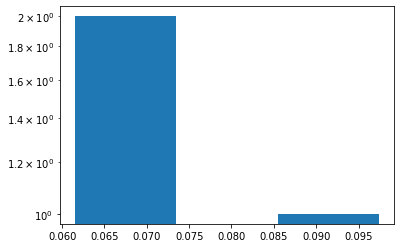

In [10]:
plt.hist(pca.explained_variance_ratio_, bins=n_components, log=True)
pca.explained_variance_ratio_.sum()

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from prettytable import PrettyTable
t = PrettyTable(['RF_score', 'Dimensions','Varience_Explained', 'PCA_time','RandomF_time', 'total_time',])




dimensions = 784

while (dimensions >=1 ):
  pca_start_time = time.time()
  pca = PCA(n_components=dimensions).fit(training_data)
  training_data_pca = pca.transform(training_data)
  pca_time = time.time() - pca_start_time
  

  X_train, X_test, y_train, y_test = train_test_split(training_data_pca, labels, test_size=0.25, random_state=49)
  
  rf_start_time = time.time()
  rfc = RandomForestClassifier()
  rfc.fit(X_train, y_train)
  rf_time = time.time() - rf_start_time
  
 

  score = rfc.score(X_test, y_test)
  score = str(round(score, 4))



  total_time = pca_time+rf_time
  pca_time = str(round(pca_time, 4))
  rf_time = str(round(rf_time, 4))
  total_time = str(round(total_time, 4))

  explained_varience  = pca.explained_variance_ratio_.sum() 
  explained_varience = str(round(explained_varience, 4))

  #print("RF score : {:.3f} #### Dimensions: {} #### Varience Explained:{} #### PCA_time: {:.3f} #### RandomF_time: {:.3f} #### total_time{:.3f}".format(score, dimensions,explained_varience, pca_time, rf_time, total_time ))
  #print("")
  t.add_row([score, dimensions , explained_varience, pca_time, rf_time ,total_time ])

  dimensions = int(dimensions / 2)

In [12]:
print(t)

+----------+------------+--------------------+----------+--------------+------------+
| RF_score | Dimensions | Varience_Explained | PCA_time | RandomF_time | total_time |
+----------+------------+--------------------+----------+--------------+------------+
|  0.7702  |    784     |        1.0         | 15.3554  |   12.9428    |  28.2982   |
|  0.8044  |    392     |       0.9953       | 18.3974  |    7.9046    |   26.302   |
|  0.859   |    196     |       0.9651       |  9.9272  |    5.5234    |  15.4506   |
|  0.8909  |     98     |       0.9127       |  6.2608  |    3.6766    |   9.9374   |
|  0.9107  |     49     |       0.8223       |  5.7597  |    2.7965    |   8.5561   |
|  0.9151  |     24     |       0.6844       |  4.1525  |    1.6292    |   5.7817   |
|  0.897   |     12     |       0.5308       |  3.7647  |    1.2286    |   4.9933   |
|  0.8071  |     6      |       0.3763       |  3.4579  |    0.8754    |   4.3332   |
|  0.4856  |     3      |       0.2306       |  3.3348

In [13]:
n_components=6
pca = PCA(n_components=n_components).fit(training_data)
training_data_pca = pca.transform(training_data)

X_train, X_test, y_train, y_test = train_test_split(training_data_pca, labels, test_size=0.25, random_state=49)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
score = rfc.score(X_test, y_test)
print("RF score : {:.2f}     Dimensions: {}".format(score, n_components))
print("")

RF score : 0.80     Dimensions: 6



### Co Ranking

In [14]:
pip install git+https://github.com/samueljackson92/coranking.git

  Cloning https://github.com/samueljackson92/coranking.git to /tmp/pip-req-build-1icemzye
  Running command git clone -q https://github.com/samueljackson92/coranking.git /tmp/pip-req-build-1icemzye
  Created wheel for coranking: filename=coranking-0.1.1-cp36-cp36m-linux_x86_64.whl size=87037 sha256=49357a9ab2be347c0c0bf057defdc15a083832f17d0fc246eb43d93f56d9f946
  Stored in directory: /tmp/pip-ephem-wheel-cache-mjk4e278/wheels/8e/e0/11/4ae911b6fc472b8bf6087e29d861d2b798c119603adf4b93fa
Successfully built coranking


In [0]:
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC

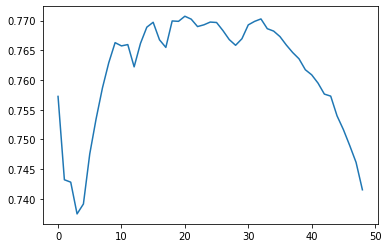

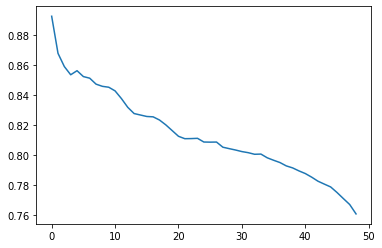

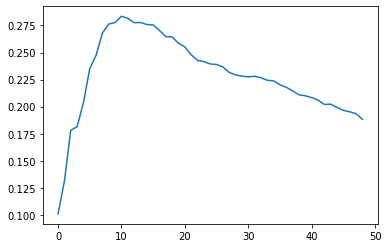

In [17]:
n_components = 2
pca = PCA(n_components).fit(training_data)
training_data_pca = pca.transform(training_data)
X_train, X_test, y_train, y_test = train_test_split(training_data_pca, labels, test_size=0.25, random_state=49)

Q = coranking.coranking_matrix(training_data[0:100], training_data_pca[0:100])

trust_pca = trustworthiness(Q, min_k=1, max_k=50)
cont_pca = continuity(Q, min_k=1, max_k=50)
lcmc_pca = LCMC(Q, min_k=1, max_k=50)

plt.plot(trust_pca)
plt.show()
plt.plot(cont_pca)
plt.show()
plt.plot(lcmc_pca)
plt.show()

In [18]:
n_components = 784

while n_components >= 1:
  pca = PCA(n_components).fit(training_data)
  training_data_pca = pca.transform(training_data)
  X_train, X_test, y_train, y_test = train_test_split(training_data_pca, labels, test_size=0.25, random_state=49)

  Q = coranking.coranking_matrix(training_data[0:100], training_data_pca[0:100])

  trust_pca = trustworthiness(Q, min_k=1, max_k=50)
  cont_pca = continuity(Q, min_k=1, max_k=50)
  lcmc_pca = LCMC(Q, min_k=1, max_k=50)

  print("components: ", n_components,"\ttrust : ",(trust_pca.sum()/50),"\tcont: ",cont_pca.sum()/50,"\tlcmc: ",lcmc_pca.sum()/50)

  n_components=int(n_components/2)

components:  784 	trust :  0.98 	cont:  0.98 	lcmc:  0.7398989898989901
components:  392 	trust :  0.9797814189465676 	cont:  0.9798492587380134 	lcmc:  0.7320505801291399
components:  196 	trust :  0.9786210650064807 	cont:  0.9791401928644348 	lcmc:  0.7090930671648821
components:  98 	trust :  0.9748526071143337 	cont:  0.9770876569602328 	lcmc:  0.6747478347668668
components:  49 	trust :  0.9647049383849491 	cont:  0.9713123500159488 	lcmc:  0.6239774765032281
components:  24 	trust :  0.9447185159921103 	cont:  0.9574649955246638 	lcmc:  0.5538323712684994
components:  12 	trust :  0.9166408062817355 	cont:  0.9361468710779878 	lcmc:  0.4768893261593974
components:  6 	trust :  0.8781940326420709 	cont:  0.9000014614283045 	lcmc:  0.3980366933599482
components:  3 	trust :  0.8060982878985251 	cont:  0.8488021047246004 	lcmc:  0.2932541049313073
components:  1 	trust :  0.6508690941184108 	cont:  0.7028571707391084 	lcmc:  0.12591062258305882


### tSNE

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [0]:
from sklearn.manifold import TSNE

In [0]:
time_start = time.time()
tsne_results = TSNE(n_components=2).fit_transform(training_data)

In [23]:
tsne_results.shape

(42000, 2)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(tsne_results, labels, test_size=0.25, random_state=49)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
score = rfc.score(X_test, y_test)

In [25]:
score

0.938952380952381

In [0]:
Q = coranking.coranking_matrix(training_data[0:100], tsne_results[0:100])

trust_pca = trustworthiness(Q, min_k=1, max_k=50)
cont_pca = continuity(Q, min_k=1, max_k=50)
lcmc_pca = LCMC(Q, min_k=1, max_k=50)


In [1]:
plt.plot(trust_pca)

NameError: ignored

In [28]:
print(trust_pca.sum()/50)

0.7280797079414117
